# Sorting based on co-occurence

In [1]:
import pandas

Get co-occurence table

In [5]:
# https://urbangrammarai.xyz/spatial_signatures/esda/co-occurence.html
tab = """
neighbor_type 	Countryside agriculture 	Accessible suburbia 	Dense residential neighbourhoods 	Connected residential neighbourhoods 	Dense urban neighbourhoods 	Open sprawl 	Wild countryside 	Warehouse/Park land 	Gridded residential quarters 	Urban buffer 	Disconnected suburbia 	Local urbanity 	Concentrated urbanity 	Regional urbanity 	Metropolitan urbanity 	Hyper concentrated urbanity
Countryside agriculture 	0 	6 	0 	3 	0 	11 	7323 	181 	1 	14659 	0 	3 	0 	0 	3 	0
Accessible suburbia 	6 	0 	2710 	3573 	2 	13403 	6 	2068 	1079 	4070 	3423 	0 	0 	0 	0 	0
Dense residential neighbourhoods 	0 	2710 	0 	4622 	3457 	3450 	0 	3632 	1246 	25 	1600 	1 	0 	0 	0 	0
Connected residential neighbourhoods 	3 	3573 	4622 	0 	1012 	1222 	1 	2163 	1939 	35 	1508 	2 	0 	1 	0 	0
Dense urban neighbourhoods 	0 	2 	3457 	1012 	0 	5 	0 	414 	443 	1 	52 	1603 	0 	0 	0 	0
Open sprawl 	11 	13403 	3450 	1222 	5 	0 	2 	10383 	660 	14793 	9521 	0 	0 	0 	0 	0
Wild countryside 	7323 	6 	0 	1 	0 	2 	0 	0 	2 	48 	0 	4 	0 	0 	1 	0
Warehouse/Park land 	181 	2068 	3632 	2163 	414 	10383 	0 	0 	73 	4837 	3313 	30 	0 	0 	0 	0
Gridded residential quarters 	1 	1079 	1246 	1939 	443 	660 	2 	73 	0 	16 	273 	133 	0 	0 	0 	0
Urban buffer 	14659 	4070 	25 	35 	1 	14793 	48 	4837 	16 	0 	420 	3 	0 	0 	1 	0
Disconnected suburbia 	0 	3423 	1600 	1508 	52 	9521 	0 	3313 	273 	420 	0 	0 	0 	1 	0 	0
Local urbanity 	3 	0 	1 	2 	1603 	0 	4 	30 	133 	3 	0 	0 	0 	341 	1 	0
Concentrated urbanity 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	12 	5
Regional urbanity 	0 	0 	0 	1 	0 	0 	0 	0 	0 	0 	1 	341 	0 	0 	133 	0
Metropolitan urbanity 	3 	0 	0 	0 	0 	0 	1 	0 	0 	1 	0 	1 	12 	133 	0 	0
Hyper concentrated urbanity 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	5 	0 	0 	0
"""
from io import StringIO
tab = pandas.read_table(StringIO(tab), index_col='neighbor_type ')
tab = (
    tab
    .divide(tab.sum(axis=1), axis=0)
    .round(2)
    #.replace(0, numpy.nan)
    .astype('float')
    * 100
)
tab.index = [i.strip(' ') for i in tab.index]
tab.columns =[i.strip(' ') for i in tab.columns]

In [6]:
tab

,Countryside agriculture,Accessible suburbia,Dense residential neighbourhoods,Connected residential neighbourhoods,Dense urban neighbourhoods,Open sprawl,Wild countryside,Warehouse/Park land,Gridded residential quarters,Urban buffer,Disconnected suburbia,Local urbanity,Concentrated urbanity,Regional urbanity,Metropolitan urbanity,Hyper concentrated urbanity
Countryside agriculture,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0
Accessible suburbia,0.0,0.0,9.0,12.0,0.0,44.0,0.0,7.0,4.0,13.0,11.0,0.0,0.0,0.0,0.0,0.0
Dense residential neighbourhoods,0.0,13.0,0.0,22.0,17.0,17.0,0.0,18.0,6.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Connected residential neighbourhoods,0.0,22.0,29.0,0.0,6.0,8.0,0.0,13.0,12.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
Dense urban neighbourhoods,0.0,0.0,49.0,14.0,0.0,0.0,0.0,6.0,6.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0
Open sprawl,0.0,25.0,6.0,2.0,0.0,0.0,0.0,19.0,1.0,28.0,18.0,0.0,0.0,0.0,0.0,0.0
Wild countryside,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Warehouse/Park land,1.0,8.0,13.0,8.0,2.0,38.0,0.0,0.0,0.0,18.0,12.0,0.0,0.0,0.0,0.0,0.0
Gridded residential quarters,0.0,18.0,21.0,33.0,8.0,11.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0
Urban buffer,38.0,10.0,0.0,0.0,0.0,38.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import numpy
a = numpy.array([
    [1, 0, 0, 4, 5],
    [2, 0, 0, 3, 5],
    [3, 0, 0, 2, 5],
    [4, 0, 0, 1, 5],
    [5, 5, 5, 5, 5]
])
ids = [f'i{i}' for i in range(len(a))]
a = pandas.DataFrame(a, index=ids, columns=ids)
b = numpy.array([
    [1, 0, 0, 0, 5],
    [2, 0, 0, 0, 5],
    [3, 0, 0, 0, 5],
    [4, 0, 0, 0, 5],
    [5, 5, 0, 0, 5]
])

In [8]:
from numba import njit
from itertools import permutations

@njit
def nscore(a):
    ds = []
    r = range(len(a))
    for i in r:
        for j in r:
            if a[i, j] != 0:
                ds.append(abs(i-j))
    return numpy.array(ds).mean()

@njit
def wnscore(a):
    ds = []
    r = range(len(a))
    total = a.sum()
    for i in r:
        for j in r:
            aij = a[i, j]
            if aij != 0:
                ds.append(abs(i-j) * aij / total)
    return numpy.array(ds).mean()

def sorter(a, w=True):
    if w is True:
        scorer = wnscore
    else:
        scorer = nscore
    best = None
    best_score = numpy.inf
    la = len(a)
    for seq in permutations(numpy.arange(la), la):
        score = scorer(a[seq, :][:, seq])
        if score < best_score:
            best = seq
            best_score = score
    return best

In [13]:
cols = [
    #'Countryside agriculture ',
    'Accessible suburbia ',
    'Dense residential neighbourhoods ',
    'Connected residential neighbourhoods ',
    'Dense urban neighbourhoods ',
    'Open sprawl ',
    #'Wild countryside ',
    'Warehouse/Park land ',
    'Gridded residential quarters ',
    'Urban buffer ',
    'Disconnected suburbia ',
    #'Local urbanity ',
    #'Concentrated urbanity ',
    #'Regional urbanity ',
    #'Metropolitan urbanity ',
    #'Hyper concentrated urbanity'
]
cols = [i.strip(' ') for i in cols]
stab = tab.loc[cols, cols]
order = sorter(stab.values, w=False)
weighted_order = sorter(stab.values, w=True)

In [14]:
order

(3, 6, 1, 2, 5, 8, 0, 4, 7)

In [15]:
weighted_order

(7, 5, 4, 8, 0, 2, 1, 6, 3)

In [16]:
rearr = (
    ['Wild countryside', 'Countryside agriculture'] +
    stab.columns[list(weighted_order)].tolist() +
    [
        'Local urbanity',
        'Regional urbanity',
        'Metropolitan urbanity',
        'Concentrated urbanity',
        'Hyper concentrated urbanity'
    ]
)
rearr = [i.strip(' ') for i in rearr]

[Text(0.5, 0, 'Wild countryside'),
 Text(1.5, 0, 'Countryside agriculture'),
 Text(2.5, 0, 'Urban buffer'),
 Text(3.5, 0, 'Warehouse/Park land'),
 Text(4.5, 0, 'Open sprawl'),
 Text(5.5, 0, 'Disconnected suburbia'),
 Text(6.5, 0, 'Accessible suburbia'),
 Text(7.5, 0, 'Connected residential neighbourhoods'),
 Text(8.5, 0, 'Dense residential neighbourhoods'),
 Text(9.5, 0, 'Gridded residential quarters'),
 Text(10.5, 0, 'Dense urban neighbourhoods'),
 Text(11.5, 0, 'Local urbanity'),
 Text(12.5, 0, 'Regional urbanity'),
 Text(13.5, 0, 'Metropolitan urbanity'),
 Text(14.5, 0, 'Concentrated urbanity'),
 Text(15.5, 0, 'Hyper concentrated urbanity')]

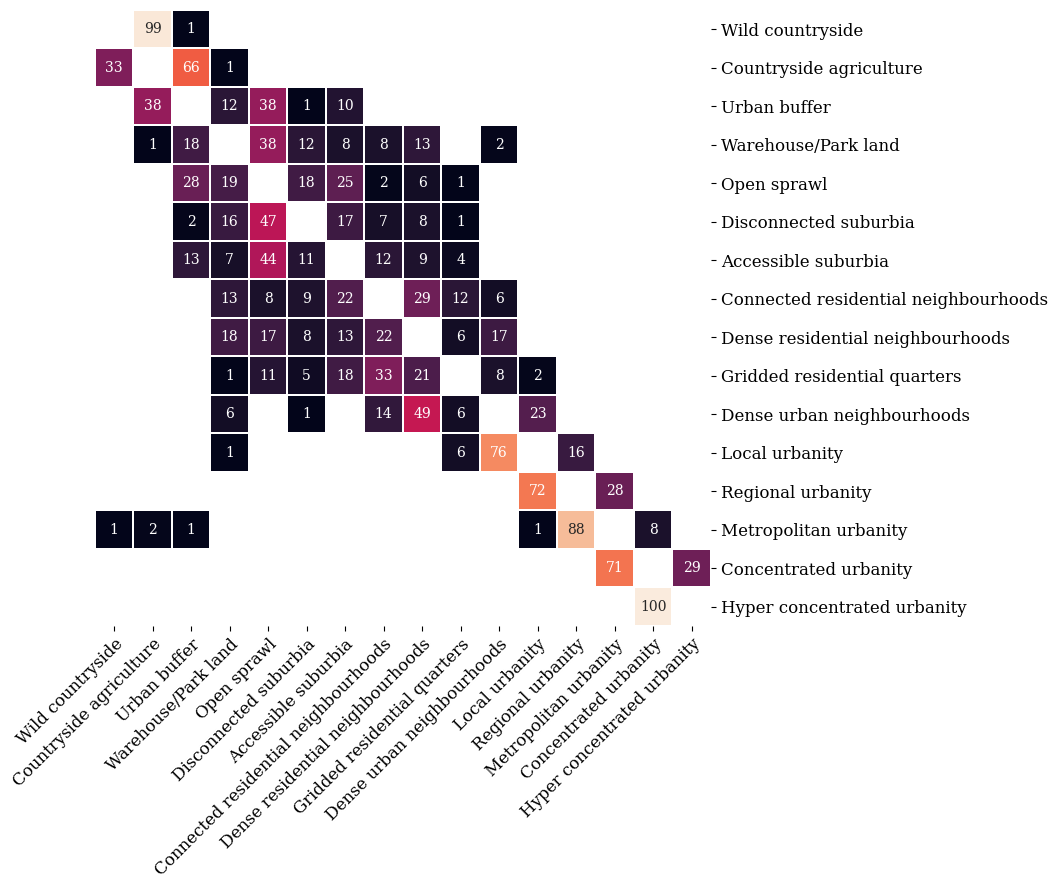

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'


fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    tab.loc[rearr, rearr].round(2).replace(0, numpy.nan),
    annot=True,
    fmt='.0f',
    vmax=100,
    square=True,
    cbar=False,
    linewidths=.2,
)
ax.tick_params('y',right=True, labelright=True, left=False, labelleft=False, rotation=0, labelsize=12)
ax.tick_params('x', rotation=45, labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')